<center>
    <h1>Pattern Analysis | SS20</h1>
    <hr>
    <br>
    <div style="margin:0 60px 0px 0">
        <img src="imgs/pat.jpg" width=200px align=center>
    </div>
    <h3>Exercises for </h3>
    <h2>Pattern Analysis Programming</h2>
    <br>
</center>

# Dealing with Highly Imbalanced Sample Distributions

`Task 1: May 6 – Mai 13`

- [Exercise 1 - Noise Variables](#1) 
- [Exercise 2 - Epanechnikov Kernel](#2)
- [Exercise 3 - Local Regression + Epanechnikov Kernel](#3)
    
<br>


In the previous task, we interpreted the intensities in our raccoon picture as relative frequencies in a raccoon PDF. However, we could also interpret these intensities as function values, and then aim to approximate these values via regression. This can also be done with a kernel, as shown, in Sec. 6.1 of our textbook by Hastie, Tibshirani, and Friedman.
The main advantage of regression via kernel smoothing is its simplicity. On the downside, this simplicity can be the source of systematic errors in the regression result.
The distribution of samples is always imbalanced at the boundary of the domain: here, samples can only be inside of the domain, but not outside. Thus, to regress a value x0 close to the boundary, the kernel can only make use of samples on one side of the kernel window. Similar situations can also arise within the domain whenever the samples are very unevenly distributed within a local neighborhood.
In this exercise, we will investigate the special case at the boundary of the domain. This case is illustrated in Fig. 6.3 and Fig. 6.4 of Hastie, Tibshirani, Friedman (→ pages 195 and 196). The goal of this exercise is to reproduce this experiment, and to obtain a Figure that is similar to Fig. 6.3 and the left part of Fig. 6.4. 

<div style="margin:0 60px 0px 0">
        <img src="imgs/3_1.png" width=600px align=center>
</div>

`
Figure 1: Left: Ground truth and noisy samples together with the regression with an Epanechnikov kernel and a a kernel-weighted local linear regression. Right: Kernels plotted for x0 = 0.25. Note that the local linear equivalent kernel may become negative.`

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import scipy
np.random.seed(42)

<a name='1'></a>

## Exercise 1 - Noise Variables

<br>

Create the dataset. First, you will need a ground truth function (dark blue in Fig. 6.3). In our implementation, clamping the domain of y = sin(0.4x) looked qualitatively quite similar, but feel free to choose your own function if you like.
  Exercise 2
Draw noisy random samples along that function. In our implementation, we use additive Gaussian noise, which is a typical simple baseline.

In [132]:
sample_size = 101
X = np.linspace(0, 10, sample_size)
Y = gaussian_noised_variable(X)

In [128]:
def ground_truth(x):
    return np.sin(0.4*x)

In [129]:
def gaussian_noised_variable(X):
    return [norm.rvs(loc=ground_truth(x), scale=0.25) for x in X]

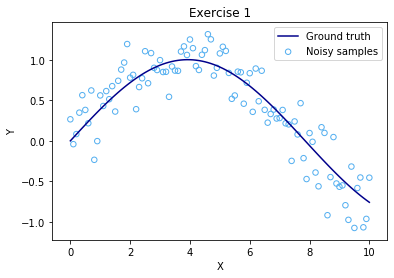

In [130]:
plt.plot(X, ground_truth(X), label="Ground truth", c='darkblue')
plt.scatter(X, Y, label="Noisy samples", s=30, facecolors='none', edgecolors='#54aff0')
plt.title("Exercise 1")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc=1)
plt.show()

<a name='2'></a>

## Exercise 2 - Epanechnikov Kernel

Perform kernel smoothing regression on the noisy samples to obtain the equivalent to the green curve in the left plot of Fig. 6.3. Use an Epanechnikov kernel, like Tibshirani, Hastie, Friedman, with a sufficiently large window size. Can you observe a similar error at the boundary? If not, wiggle on your function until a similar error occurs.

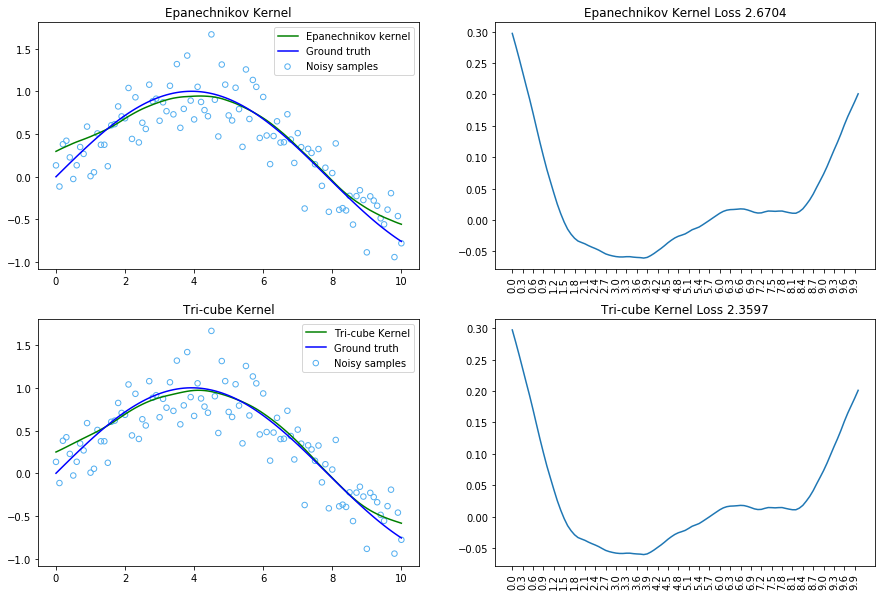

In [166]:
epanechnikov_weights = np.zeros(sample_size)
f_hat = np.zeros(sample_size)
window_size = 2

loss_e = []
loss_t = []

  
W_epa = np.zeros((sample_size, sample_size))
W_tri = np.zeros((sample_size, sample_size))

B = np.array([(1,xs[i]) for i in range(sample_size)])

results_e = []
results_t = []


step = 10/sample_size
  
for i in range(sample_size):
    kernel_linspace = np.linspace(0-i*step, 10-i*step, sample_size) / window_size;

    for j in range(sample_size):
        if(np.absolute(kernel_linspace[j]) <= 1):
            W_epa[j,j] = (1 - kernel_linspace[j]**2)
            W_tri[j,j] = (1 - np.abs(kernel_linspace[j]**3))**3

        else:
            W_epa[j,j] = 0
            W_tri[j,j] = 0
    
    result_e = np.sum((np.diag(W_epa) * samples)) / np.sum(np.diag(W_epa))
    results_e.append(result_e)  
    loss_e.append(result_e - ys[i])
    
    result_t = np.sum((np.diag(W_tri) * samples)) / np.sum(np.diag(W_tri))
    results_t.append(result_t)  
    loss_t.append(result_t - ys[i])
    
    
e_total_loss = np.round(np.sum(loss_e),4)
t_total_loss = np.round(np.sum(loss_t),4)
    
fig, axs = plt.subplots(2, 2, figsize=(15,10))

axs[0,0].scatter(X, Y, label="Noisy samples", s=30, facecolors='none', edgecolors='#54aff0')
axs[0,0].plot(X, results_e, color='green', label='Epanechnikov kernel')
axs[0,0].plot(X, ground_truth(X), color='blue', label='Ground truth')
axs[0,0].set_title('Epanechnikov Kernel')
axs[0,0].legend()

axs[0,1].plot(X, loss)
axs[0,1].set_title('Epanechnikov Kernel Loss {}'.format(e_total_loss))
axs[0,1].set_xticks(X[::3])
axs[0,1].tick_params(axis='x', rotation=90)

axs[1,0].scatter(X, Y, label="Noisy samples", s=30, facecolors='none', edgecolors='#54aff0')
axs[1,0].plot(X, results_t, color='green', label='Tri-cube Kernel')
axs[1,0].plot(X, ground_truth(X), color='blue', label='Ground truth')
axs[1,0].set_title('Tri-cube Kernel')
axs[1,0].legend()

axs[1,1].plot(X, loss)
axs[1,1].set_title('Tri-cube Kernel Loss {}'.format(t_total_loss))
axs[1,1].set_xticks(X[::3])
axs[1,1].tick_params(axis='x', rotation=90)

plt.show()

<a name='3'></a>

## Exercise 3 - Local Regression + Epanechnikov Kernel

Perform a kernel-weighted local linear regression, as described in Eqn. (6.8) and Eqn. (6.9), and plot this estimate. Hopefully, the boundary region is better extrapolated now? How well are the other areas of your function represented? Please also plot the Epanechnikov kernel and the local linear equivalent kernel (shown in Fig. 6.4). Do you observe a similar difference in both kernels as shown in the book?

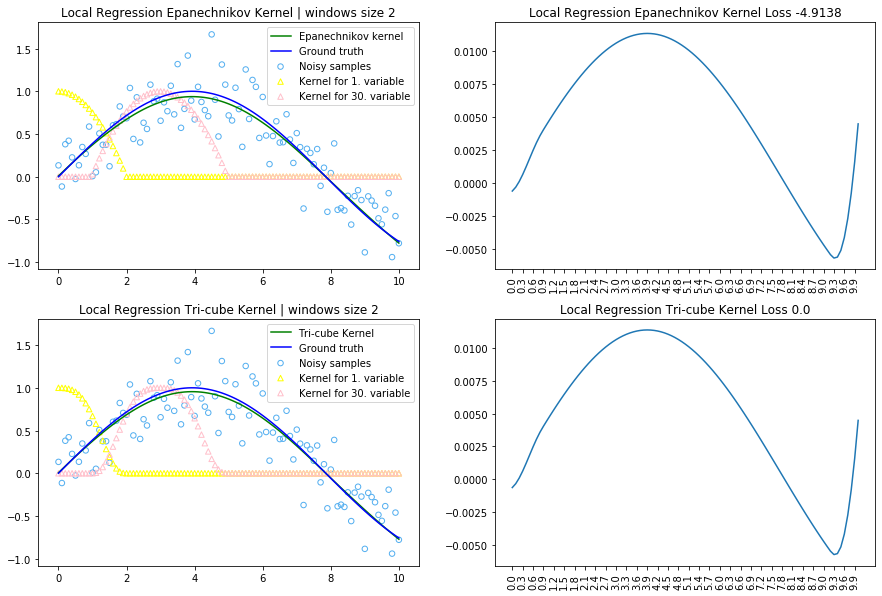

In [238]:
epanechnikov_weights = np.zeros(sample_size)

f_hat_e = np.zeros(sample_size)
f_hat_t = np.zeros(sample_size)

window_size = 2

loss_e = []
loss_t = []
  
W_epa = np.zeros((sample_size, sample_size))
W_tri = np.zeros((sample_size, sample_size))
W_epas = []
W_tris = []


B = np.array([(1,xs[i]) for i in range(sample_size)])

step = 10/sample_size
  
for i in range(sample_size):
    kernel_linspace = np.linspace(0-i*step, 10-i*step, sample_size) / window_size;
    
    for j in range(sample_size):
        if(np.absolute(kernel_linspace[j]) <= 1):
            W_epa[j,j] = (1 - kernel_linspace[j]**2)
            W_tri[j,j] = (1 - np.abs(kernel_linspace[j]**3))**3
    
        else:
            W_epa[j,j] = 0
            W_tri[j,j] = 0
                   
    
    W_epas.append(np.diag(W_epa).copy())
    W_tris.append(np.diag(W_tri).copy())
        
    
    f_hat_e[i] = B[i].T.dot(np.linalg.inv(B.T.dot(W_epa.dot(B))).dot(B.T.dot(W_epa.dot(ys))));
    loss_e.append(f_hat_e[i] - ys[i])
    
    f_hat_t[i] = B[i].T.dot(np.linalg.inv(B.T.dot(W_tri.dot(B))).dot(B.T.dot(W_tri.dot(ys))));
    loss_e.append(f_hat_t[i] - ys[i])
    
    
e_total_loss = np.round(np.sum(loss_e),4)
t_total_loss = np.round(np.sum(loss_t),4)
    
fig, axs = plt.subplots(2, 2, figsize=(15,10))

axs[0,0].scatter(X, Y, label="Noisy samples", s=30, facecolors='none', edgecolors='#54aff0')
axs[0,0].scatter(X, W_epas[0], marker='^',label="Kernel for 1. variable", s=30, facecolors='none', edgecolors='yellow')
axs[0,0].scatter(X, W_epas[30], marker='^',label="Kernel for 30. variable", s=30, facecolors='none', edgecolors='pink')
axs[0,0].plot(X, f_hat_e, color='green', label='Epanechnikov kernel')
axs[0,0].plot(X, ground_truth(X), color='blue', label='Ground truth')
axs[0,0].set_title('Local Regression Epanechnikov Kernel | windows size {}'.format(window_size))
axs[0,0].legend()

axs[0,1].plot(X, loss)
axs[0,1].set_title('Local Regression Epanechnikov Kernel Loss {}'.format(e_total_loss))
axs[0,1].set_xticks(X[::3])
axs[0,1].tick_params(axis='x', rotation=90)

axs[1,0].scatter(X, Y, label="Noisy samples", s=30, facecolors='none', edgecolors='#54aff0')
axs[1,0].scatter(X, W_tris[0], marker='^',label="Kernel for 1. variable", s=30, facecolors='none', edgecolors='yellow')
axs[1,0].scatter(X, W_tris[30], marker='^',label="Kernel for 30. variable", s=30, facecolors='none', edgecolors='pink')

axs[1,0].plot(X, f_hat_t, color='green', label='Tri-cube Kernel')
axs[1,0].plot(X, ground_truth(X), color='blue', label='Ground truth')
axs[1,0].set_title('Local Regression Tri-cube Kernel | windows size {}'.format(window_size))
axs[1,0].legend()

axs[1,1].plot(X, loss)
axs[1,1].set_title('Local Regression Tri-cube Kernel Loss {}'.format(t_total_loss))
axs[1,1].set_xticks(X[::3])
axs[1,1].tick_params(axis='x', rotation=90)

plt.show()